In [2]:
import numpy as np
from PIL import Image, ImageFilter, ImageOps
from ImageFrame import Frame
from EdgeFinderV4 import BoundaryDetector as BD2
import timeit
import cv2 as cv
import matplotlib.pylab as plt
from controll_angle_functions import get_angle

load CVS file successfully
[841.  219.5]
(3, array([83.56526085, 82.96205924]), array([[ 55., 151.],
       [180., 163.],
       [261., 173.],
       [321., 181.],
       [368., 188.],
       [405., 195.],
       [438., 199.]]))


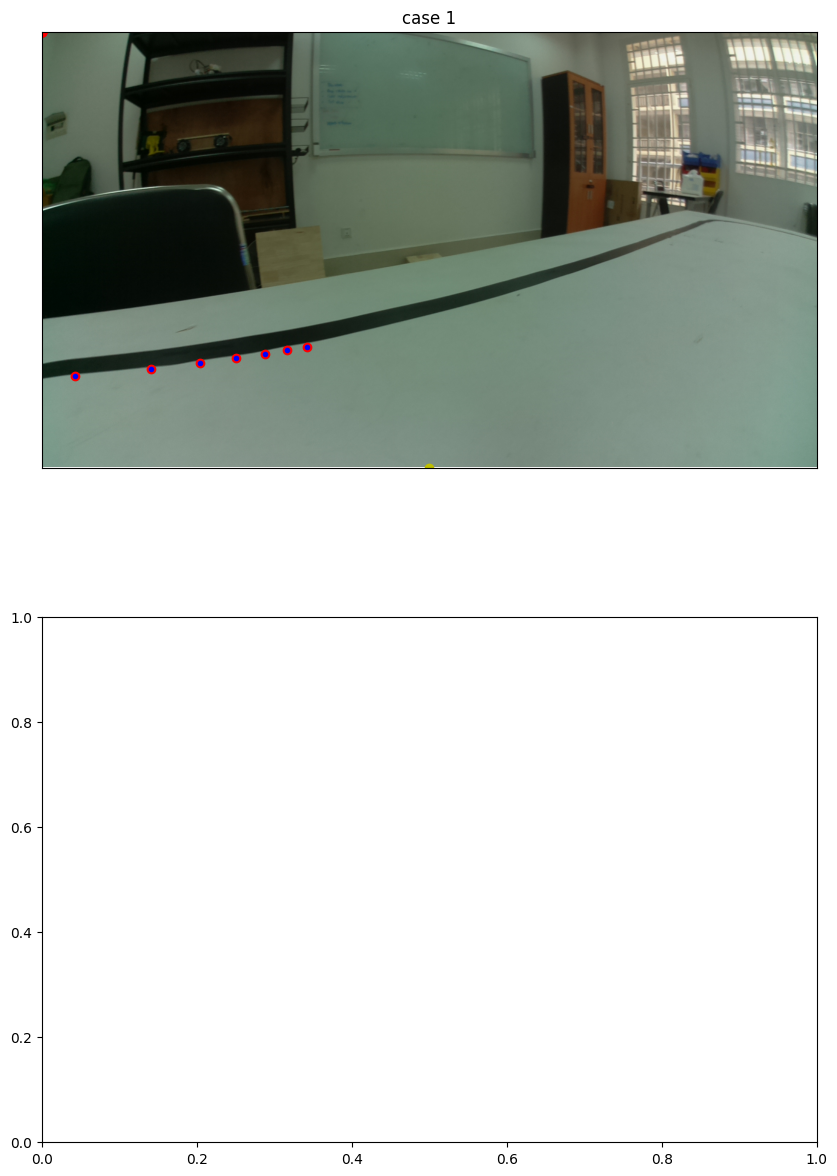

In [5]:
""" Case Fig3.7 DES: 
    (1)IMAGE of case1 bothside different lane
    (2)IMAGE of case2 bothside same lane
    (3)IMAGE single side
    *note : have boundary points and title "case 1" ...
"""
frame1 = Frame(1280,720,5,720/2,720)
#fig, ax = plt.subplots(1,3,figsize=(int(19/4*3),int(25/8)))
fig, ax = plt.subplots(2,1,figsize=(10,15))

imgs_list = [70,65,81]
for n,i in enumerate([imgs_list[2]]):
    
    img = np.array(Image.open("TestingImage/Image"+str(i)+".jpg"))
    #applying the masks to the image
    kernal = np.array([-1,-1,-1,0,1,1,1])
    #Using EdgeDetection
    BP = BD2(img[:,:,2],kernal,frame1,70)

    P = BP.boundary
    
    #print(P)
    A = get_angle(P,1280,720)    
    ax[n].imshow(img)
    #for key in frame1.fline.keys():
    #    ax[n].plot(frame1.fline[key][:,0],frame1.fline[key][:,1],'k,')
    ax[n].axis([0,1280,720,0])
    ax[n].set_title("case {num}".format(num=n+1))
    ax[n].plot(BP.boundary[:,0],BP.boundary[:,1],"ro")
    ax[n].set_xticks([]), ax[n].set_yticks([])

    #BP.ploting_onImage(img,str(n)+' case '+str(A[0]))
    ax[n].plot(A[2][:,0], 720-A[2][:,1], 'b.')
    # mp_1 = (A[2][1] + A[2][0])/2.0
    # mp_2 = (A[2][3] + A[2][2])/2.0
    # mp_3 = (A[2][5] + A[2][4])/2.0
    print(mp_1)
    # ax[n].plot(mp_1[0],720-mp_1[1],'b*')
    # ax[n].plot(mp_2[0],720-mp_2[1],'b*')
    # ax[n].plot(mp_3[0],720-mp_3[1],'b*')
    ax[n].plot(1280/2,720,'yo')
    #plt.plot([1280/2,1280/2+200*np.sin(np.deg2rad(A[1][0]))],[720-0.0,720-200*np.cos(np.deg2rad(A[1][0]))],'b-')
    print(A)        
    # 
plt.show()